<a href="https://colab.research.google.com/github/sssp03/lab.1/blob/main/codigo_lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


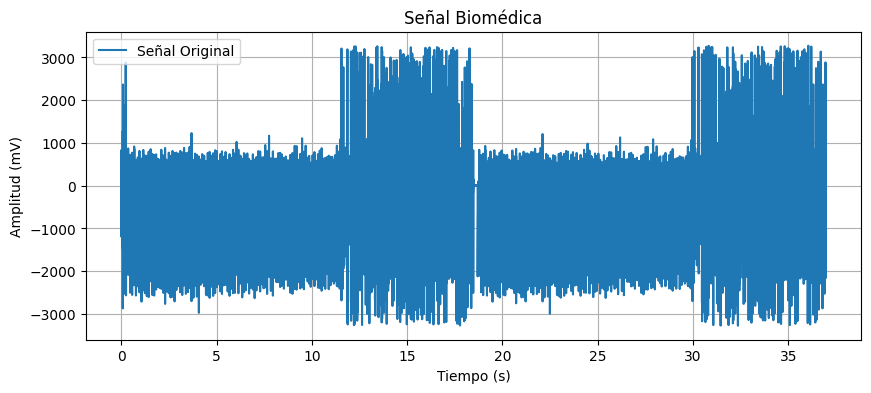

[Manual] Media: 4.9755292239851485 mV
[Manual] Desviación estándar: 388.38838280875746 mV
[Manual] Coeficiente de variación: 7805.971291184134%
[NumPy] Media: 4.975529223985174 mV
[NumPy] Desviación estándar: 388.3883828087493 mV
[NumPy] Coeficiente de variación: 7805.9712911839315%


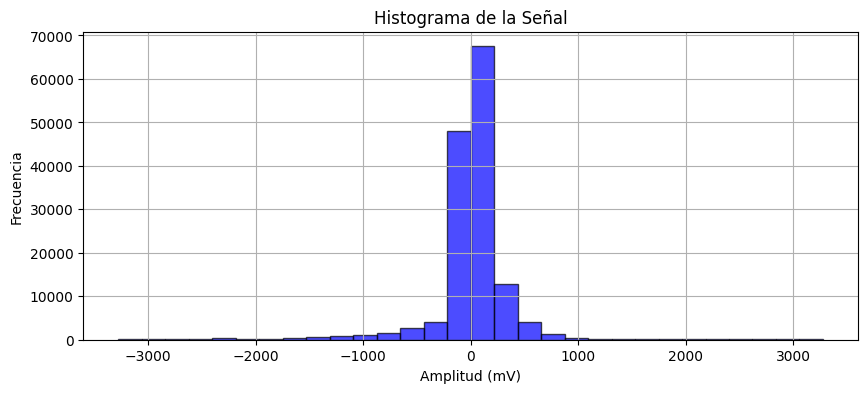

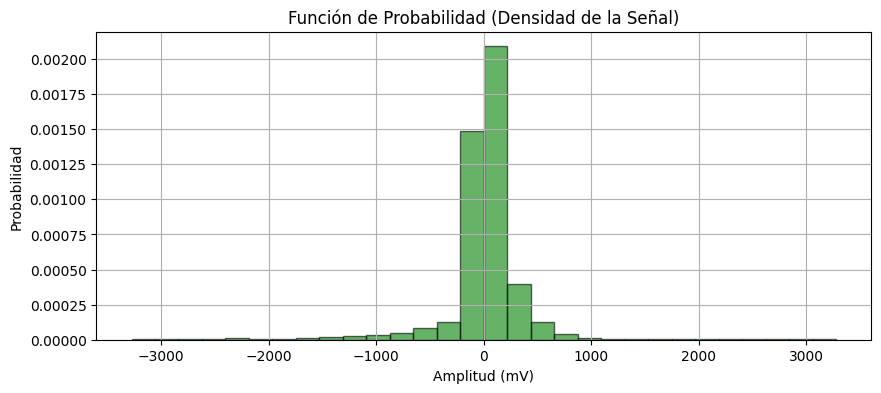

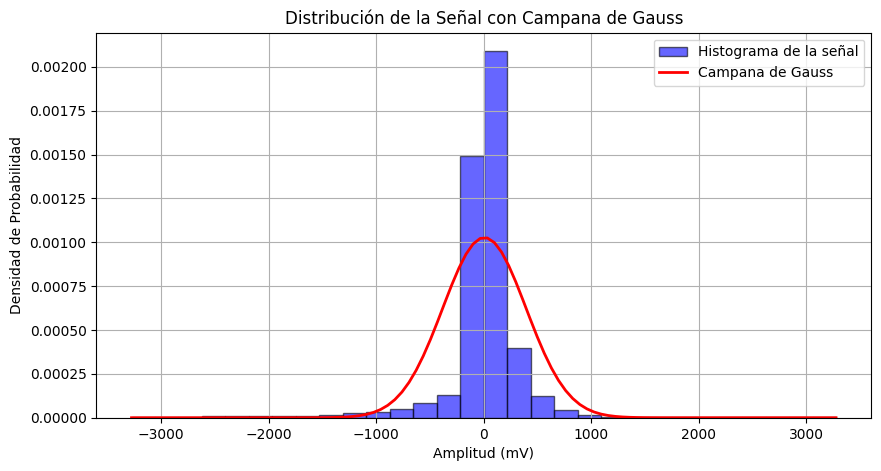

SNR con ruido gaussiano: 37.81259409500269 dB
SNR con ruido de impulso: 30.923926168504515 dB
SNR con ruido de artefacto: 25.765466762143106 dB


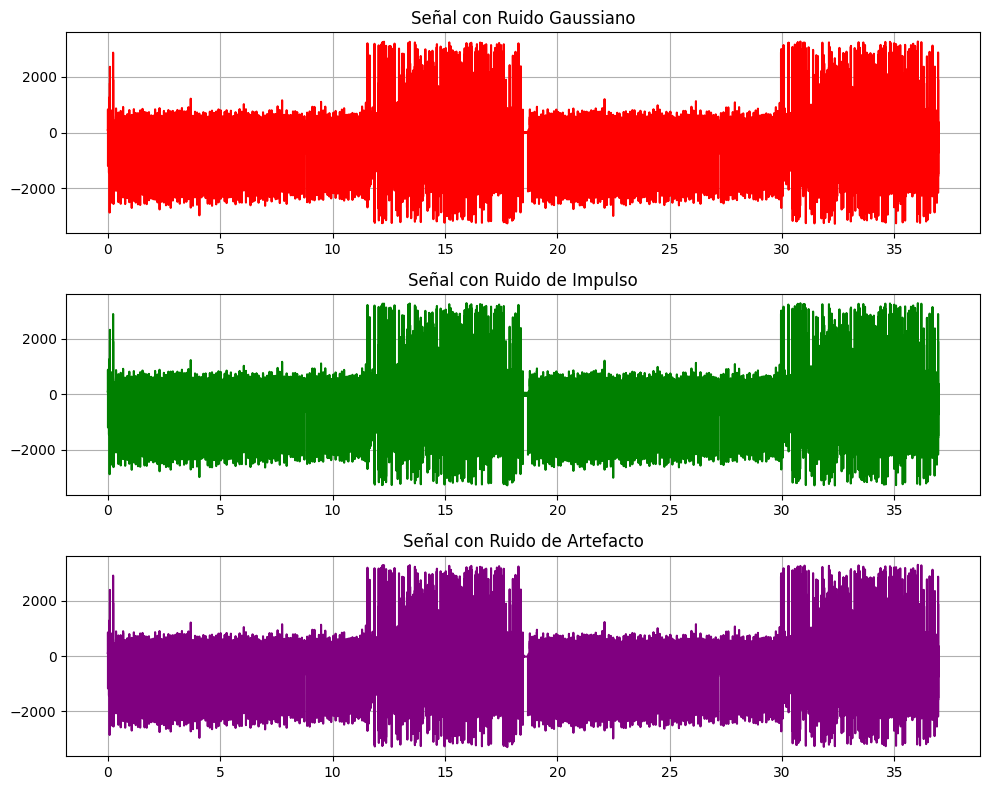

In [7]:
!pip install wfdb
import wfdb
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm  # Para la función de distribución normal
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Definir la ruta donde se encuentra el archivo descargado
directory = "/content/drive/My Drive/lab 1 ps"
file_name = "emg_neuropathy"
file_path = os.path.join(directory, file_name)

# Cargar la señal desde PhysioNet
record = wfdb.rdrecord(file_path)
fs = record.fs  # Frecuencia de muestreo
signal = record.p_signal[:, 0] * 1000  # Convertir a mV
time = np.arange(len(signal)) / fs  # Eje de tiempo

# Graficar la señal original
plt.figure(figsize=(10, 4))
plt.plot(time, signal, label="Señal Original")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (mV)")
plt.title("Señal Biomédica")
plt.legend()
plt.grid()
plt.show()

# --- Cálculo de Estadísticos ---
def calcular_media_manual(signal):
    suma = 0
    for x in signal:
        suma += x
    return suma / len(signal)

def calcular_desviacion_manual(signal, media):
    return (sum((x - media) ** 2 for x in signal) / len(signal)) ** 0.5

def calcular_coef_var_manual(desviacion, media):
    return (desviacion / media) * 100 if media != 0 else 0

media_manual = calcular_media_manual(signal)
desviacion_manual = calcular_desviacion_manual(signal, media_manual)
coef_var_manual = calcular_coef_var_manual(desviacion_manual, media_manual)

print(f"[Manual] Media: {media_manual} mV")
print(f"[Manual] Desviación estándar: {desviacion_manual} mV")
print(f"[Manual] Coeficiente de variación: {coef_var_manual}%")

# Usando funciones predefinidas de NumPy
media_numpy = np.mean(signal)
desviacion_numpy = np.std(signal)
coef_var_numpy = (desviacion_numpy / media_numpy) * 100

print(f"[NumPy] Media: {media_numpy} mV")
print(f"[NumPy] Desviación estándar: {desviacion_numpy} mV")
print(f"[NumPy] Coeficiente de variación: {coef_var_numpy}%")

# Histograma de la señal
plt.figure(figsize=(10, 4))
plt.hist(signal, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histograma de la Señal')
plt.xlabel('Amplitud (mV)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Función de densidad de probabilidad (estimación)
plt.figure(figsize=(10, 4))
plt.hist(signal, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Función de Probabilidad (Densidad de la Señal)')
plt.xlabel('Amplitud (mV)')
plt.ylabel('Probabilidad')
plt.grid(True)
plt.show()

# Histograma de la señal con la Campana de Gauss
plt.figure(figsize=(10, 5))
plt.hist(signal, bins=30, density=True, alpha=0.6, color='b', edgecolor='black', label="Histograma de la señal")

# Generar la Campana de Gauss
x = np.linspace(min(signal), max(signal), 100)
pdf = norm.pdf(x, media_numpy, desviacion_numpy)
plt.plot(x, pdf, 'r-', linewidth=2, label="Campana de Gauss")

plt.title("Distribución de la Señal con Campana de Gauss")
plt.xlabel("Amplitud (mV)")
plt.ylabel("Densidad de Probabilidad")
plt.legend()
plt.grid(True)
plt.show()

# --- Contaminación con Ruido ---
def calcular_snr(original, ruidosa):
    potencia_original = np.mean(original ** 2)
    potencia_ruido = np.mean((original - ruidosa) ** 2)
    return 10 * np.log10(potencia_original / potencia_ruido)

# Ruido Gaussiano
ruido_gaussiano = np.random.normal(0, 5, len(signal))
senal_gaussiana = signal + ruido_gaussiano
snr_gaussiano = calcular_snr(signal, senal_gaussiana)
print(f"SNR con ruido gaussiano: {snr_gaussiano} dB")

# Ruido de Impulso
ruido_impulso = np.random.choice([0, 50, -50], size=len(signal), p=[0.95, 0.025, 0.025])
senal_impulso = signal + ruido_impulso
snr_impulso = calcular_snr(signal, senal_impulso)
print(f"SNR con ruido de impulso: {snr_impulso} dB")

# Ruido de artefacto (onda cuadrada superpuesta)
ruido_artefacto = 20 * np.sign(np.sin(2 * np.pi * 1 * time))
senal_artefacto = signal + ruido_artefacto
snr_artefacto = calcular_snr(signal, senal_artefacto)
print(f"SNR con ruido de artefacto: {snr_artefacto} dB")

# Graficar señales ruidosas
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
axs[0].plot(time, senal_gaussiana, label="Ruido Gaussiano", color='r')
axs[0].set_title("Señal con Ruido Gaussiano")
axs[0].grid()

axs[1].plot(time, senal_impulso, label="Ruido de Impulso", color='g')
axs[1].set_title("Señal con Ruido de Impulso")
axs[1].grid()

axs[2].plot(time, senal_artefacto, label="Ruido de Artefacto", color='purple')
axs[2].set_title("Señal con Ruido de Artefacto")
axs[2].grid()

plt.tight_layout()
plt.show()
